# COVID-19 cases per Brazilian States (from 2020 to 2022)


Objective: find out which Brazilian states had the highest number of COVID-19 cases, and how this distribution took place over time.


Method: the *geopandas* library was used to create **choropleth maps** that represent the distribution of coronavirus cases across Brazilian states. Graphs were plotted for the first and second half of 2020 and 2021, and the first half of 2022.


In [59]:
# let's start by importing the necessary libraries

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In order to plot Brazil's map, the file wich contains the geographical information we need was downloaded from <a href="https://www.ibge.gov.br/" target="_blank">IBGE</a> and saved on a local folder. 

In [60]:
#saving the geographical DataFrame as "states_info"

states_info = gpd.read_file(r'C:\Users\lepae\Documents\IGTI\Programação\Udemy - Python for Data Science and Machine Learning Bootcamp\Py_DS_ML_Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\09-Geographical-Plotting\bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')

In [61]:
# checking the structure and columns of the data frame

states_info.head()

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


In [62]:
# checking the type of the data frame

type(states_info)

geopandas.geodataframe.GeoDataFrame

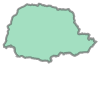

In [5]:
#experimenting to see what happens when we call "states_info.geometry"

states_info.geometry[2]

As we could see, *states_info.geometry* plots the polygon that represents each Brazilian state. Now we need a data frame that contains the information of number of COVID-19 cases per state.

This data frame was downloaded from <a href="https://covid.saude.gov.br/" target="_blank">covid.saude.gov.br</a>  and saved as "corona_cases".

**Note: this data refers to the first semester of 2022.**

In [ ]:
corona_cases = pd.read_csv('HIST_PAINEL_COVIDBR_2022_Parte1_14abr2022.csv',  sep=';')

In [7]:
corona_cases.info

<bound method DataFrame.info of               regiao estado municipio  coduf    codmun  codRegiaoSaude  \
0             Brasil    NaN       NaN     76       NaN             NaN   
1             Brasil    NaN       NaN     76       NaN             NaN   
2             Brasil    NaN       NaN     76       NaN             NaN   
3             Brasil    NaN       NaN     76       NaN             NaN   
4             Brasil    NaN       NaN     76       NaN             NaN   
...              ...    ...       ...    ...       ...             ...   
584373  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
584374  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
584375  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
584376  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
584377  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   

         nomeRegiaoSaude        data  semanaEpi  populacaoTCU2019  \
0         

In [63]:
# checking the content from "corona_cases" Data Frame

corona_cases.head(120)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-10,2,1777225.0,286791.0,329,6769,6,NaN,NaN,NaN
116,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-11,2,1777225.0,287377.0,586,6775,6,NaN,NaN,NaN
117,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-12,2,1777225.0,288173.0,796,6778,3,NaN,NaN,NaN
118,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-13,2,1777225.0,288595.0,422,6782,4,NaN,NaN,NaN


As we can see, the information is not grouped by state. To fix that, I am going to use the **.groupby()** method, and then call the **.sum()** method, so it adds up the number of cases for each state.

In [64]:
corona_group = corona_cases.groupby('estado')

In [12]:
corona_sum = corona_group.sum()

In [65]:
# checking the type of "corona_sum", to make sure we are still working with a Data Frame

type(corona_sum)

pandas.core.frame.DataFrame

Now that we have both Data Frames ready to go ("corona_sum" for the number of covid cases per state, and "states_info" for the geographical information), we need to merge them by their *states* column. We have to make sure that we address the Geographical Data Frame to the *left* argument, so that the merging results in a **GeoDataFrame**.

In [66]:
merged_df = pd.merge(left=states_info, right=corona_sum, left_on='sigla', right_on='estado')

In [67]:
type(merged_df)

geopandas.geodataframe.GeoDataFrame

In [68]:
# checking the merging result

merged_df.head(20)

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,...,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,...,1.330595e+09,213776,1.459818e+09,235495420.0,734586,5311060,3416,0.0,0.0,2184.0
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,...,4.108184e+08,68960,5.780291e+08,97301242.0,292824,2114292,1582,0.0,0.0,104.0
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,...,1.701829e+09,345662,2.378263e+09,446151422.0,1667908,8732268,4276,0.0,0.0,3016.0
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,...,2.754197e+09,737010,4.403109e+09,613978148.0,2250138,12254932,8868,0.0,0.0,3536.0
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,...,2.184336e+08,66374,4.781288e+08,64183438.0,96664,1289554,562,0.0,0.0,416.0
5,Alagoas,None,Sim,AL,27,1000001,None,NaN,None,None,...,2.864743e+08,89648,6.941703e+08,57596784.0,110158,1378998,1060,0.0,0.0,1248.0
6,Tocantins,None,Sim,TO,17,1000001,None,NaN,None,None,...,2.458128e+08,121542,3.271561e+08,58699662.0,136434,845466,418,0.0,0.0,1664.0
7,Roraima,None,Sim,RR,14,1000001,None,NaN,None,None,...,2.184218e+07,14654,1.259983e+08,30578206.0,52560,440402,138,0.0,0.0,520.0
8,Amazonas,None,Sim,AM,13,1000001,None,NaN,None,None,...,8.385447e+07,54306,8.620762e+08,112425722.0,295928,2920626,654,0.0,0.0,1352.0
9,Acre,None,Sim,AC,12,1000001,None,NaN,None,None,...,2.746089e+07,19826,1.834425e+08,23087914.0,71850,402146,290,0.0,0.0,104.0


Now we can plot the Choropleth Map of the COVID-19 cases for the first semester of 2022, simply by using the **.plot()** method:


Text(0.5, 1.0, 'Brazilian States Corona Map - New cases for the first semester 2022')

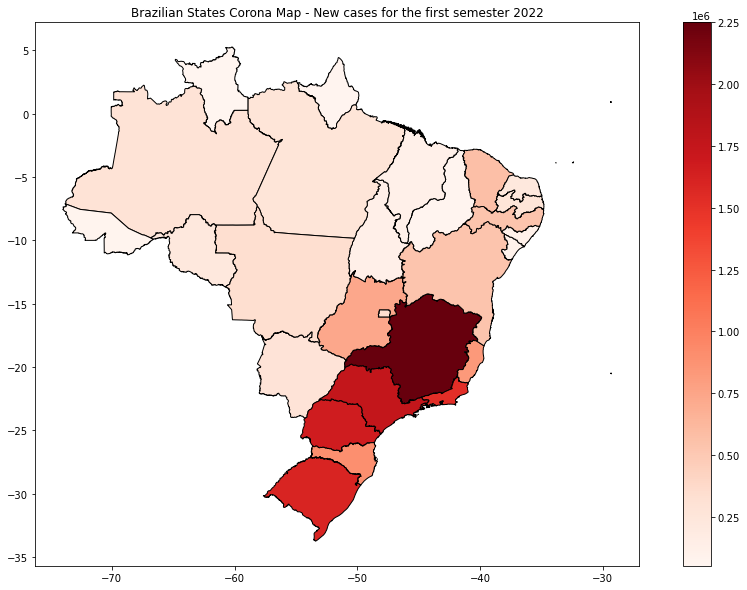

In [69]:
ax = merged_df.plot(column='casosNovos', figsize = (16,10), legend=True, cmap = 'Reds', edgecolor= 'black')
ax.set_title('Brazilian States Corona Map - New cases for the first semester 2022')

The map shows us that the state with the highest number of COVID-19 cases is Minas Gerais, followed by Rio de Janeiro, São Paulo, Paraná and Rio Grande do Sul.

Now we are going to do the same process for the first and second half of 2020 and 2021. After we plot all these maps, we are going to make subplots with the same color bar scale, so we can compare the evolution of the number of cases over time.

## 2020 First semester:

In [21]:
corona_cases_2020_01 = pd.read_csv('HIST_PAINEL_COVIDBR_2020_Parte1_14abr2022.csv',  sep=';')


In [22]:
corona_cases_2020_01.info

<bound method DataFrame.info of               regiao estado municipio  coduf    codmun  codRegiaoSaude  \
0             Brasil    NaN       NaN     76       NaN             NaN   
1             Brasil    NaN       NaN     76       NaN             NaN   
2             Brasil    NaN       NaN     76       NaN             NaN   
3             Brasil    NaN       NaN     76       NaN             NaN   
4             Brasil    NaN       NaN     76       NaN             NaN   
...              ...    ...       ...    ...       ...             ...   
714563  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
714564  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
714565  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
714566  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
714567  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   

         nomeRegiaoSaude        data  semanaEpi  populacaoTCU2019  \
0         

In [23]:
corona_cases_2020_01.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,1.0,1.0,NaN


In [24]:
corona_group_2020_01 = corona_cases_2020_01.groupby('estado')

In [25]:
corona_group_2020_01.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
245,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-25,9,1777225.0,0,0,0,0,NaN,NaN,NaN
246,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-26,9,1777225.0,0,0,0,0,NaN,NaN,NaN
247,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-27,9,1777225.0,0,0,0,0,NaN,NaN,NaN
248,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-28,9,1777225.0,0,0,0,0,NaN,NaN,NaN
249,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-29,9,1777225.0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4353,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2020-02-25,9,3015268.0,0,0,0,0,NaN,NaN,NaN
4354,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2020-02-26,9,3015268.0,0,0,0,0,NaN,NaN,NaN
4355,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2020-02-27,9,3015268.0,0,0,0,0,NaN,NaN,NaN
4356,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2020-02-28,9,3015268.0,0,0,0,0,NaN,NaN,NaN


In [26]:
corona_sum_2020_01 = corona_group_2020_01.sum()

In [27]:
corona_sum_2020_01.head(10)

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
estado,,,,,,,,,,,,
AC,35424,3.353768e+08,3.353397e+07,65431,2.513515e+08,1812166,39250,48173,1062,0.0,0.0,127.0
AL,357453,3.538061e+09,3.498292e+08,294661,9.511467e+08,4660474,119450,143228,3134,0.0,0.0,1524.0
AM,104416,1.025324e+09,1.023992e+08,178631,1.181210e+09,10269048,201880,430771,6536,0.0,0.0,1651.0
AP,35040,3.251942e+08,3.251568e+07,48451,2.410333e+08,3461476,72936,58556,1130,0.0,0.0,381.0
BA,1544076,1.548574e+10,1.536560e+09,1186111,4.238823e+09,10409237,332308,260939,6926,0.0,0.0,1651.0
CE,544019,5.420288e+09,5.377406e+08,526721,2.602642e+09,15505309,347764,846545,15336,0.0,0.0,2413.0
DF,15105,6.731127e+07,6.731127e+06,6001,8.593514e+08,6776068,212584,90188,2938,0.0,0.0,127.0
ES,326112,3.213435e+09,3.170179e+08,226741,1.145315e+09,6399675,166584,220433,5090,0.0,0.0,889.0
GO,1639404,1.634728e+10,1.624861e+09,702181,2.000231e+09,3468508,135882,84139,3312,0.0,0.0,2667.0


In [28]:
merged_df_2020_01 = pd.merge(left=states_info, right=corona_sum_2020_01, left_on='sigla', right_on='estado')

Text(0.5, 1.0, 'Brazilian States Corona Map - New cases for the first semester 2020')

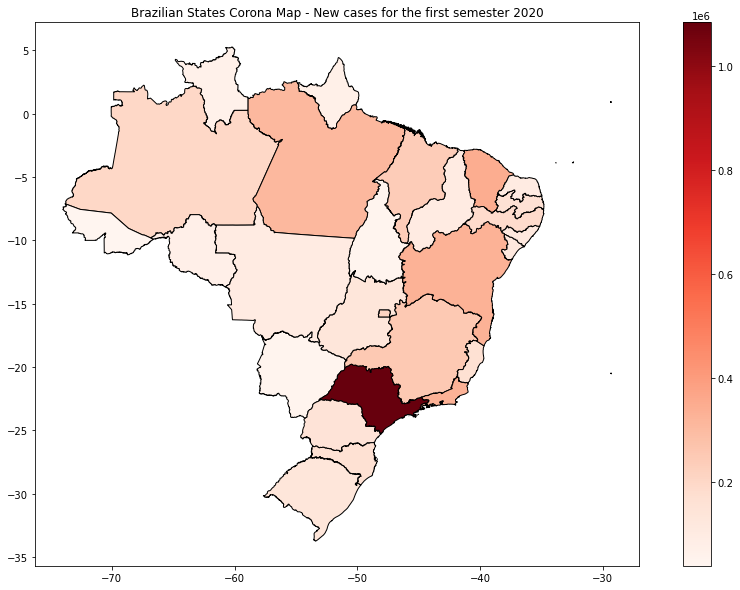

In [29]:
map_2020_01 = merged_df_2020_01.plot(column='casosNovos', figsize = (16,10), legend=True, cmap = 'Reds', edgecolor= 'black')
map_2020_01.set_title('Brazilian States Corona Map - New cases for the first semester 2020')

For the first semester of 2020, São Paulo was the state with the highest number of COVID-19 cases.

## 2020 second semester:

In [30]:
corona_cases_2020_02 = pd.read_csv('HIST_PAINEL_COVIDBR_2020_Parte2_14abr2022.csv',  sep=';')


In [31]:
corona_group_2020_02 = corona_cases_2020_02.groupby('estado')

In [32]:
corona_group_2020_02.head(20)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
164,Norte,RO,NaN,11,NaN,NaN,NaN,2020-08-01,31,1777225.0,39504,512,881,9,NaN,NaN,NaN
165,Norte,RO,NaN,11,NaN,NaN,NaN,2020-08-02,32,1777225.0,39893,389,884,3,NaN,NaN,NaN
166,Norte,RO,NaN,11,NaN,NaN,NaN,2020-08-03,32,1777225.0,40016,123,888,4,NaN,NaN,NaN
167,Norte,RO,NaN,11,NaN,NaN,NaN,2020-08-04,32,1777225.0,41239,1223,898,10,NaN,NaN,NaN
168,Norte,RO,NaN,11,NaN,NaN,NaN,2020-08-05,32,1777225.0,42020,781,918,20,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4157,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2020-08-16,34,3015268.0,136467,1453,1976,18,NaN,NaN,NaN
4158,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2020-08-17,34,3015268.0,138735,2268,2042,66,NaN,NaN,NaN
4159,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2020-08-18,34,3015268.0,140170,1435,2097,55,NaN,NaN,NaN
4160,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2020-08-19,34,3015268.0,141762,1592,2148,51,NaN,NaN,NaN


In [33]:
corona_sum_2020_02 = corona_group_2020_02.sum()

In [34]:
corona_sum_2020_02.head()

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
estado,,,,,,,,,,,,
AC,42228,4.040366e+08,4.039919e+07,148810,2.698721e+08,9244540,43990,205850,528,0.0,0.0,153.0
AL,429624,4.262388e+09,4.214478e+08,672880,1.021231e+09,26701772,90186,648194,1844,0.0,0.0,1836.0
AM,125307,1.235233e+09,1.233628e+08,407610,1.268247e+09,45939172,200146,1314902,4034,0.0,0.0,1989.0
AP,41616,3.917694e+08,3.917244e+07,109990,2.587937e+08,15616776,63466,224834,720,0.0,0.0,459.0
BA,1859103,1.865605e+10,1.851131e+09,2710930,4.551158e+09,101757476,654492,2105730,11332,0.0,0.0,1989.0


In [35]:
merged_df_2020_02 = pd.merge(left=states_info, right=corona_sum_2020_02, left_on='sigla', right_on='estado')

Text(0.5, 1.0, 'Brazilian States Corona Map - New cases for the second semester 2020')

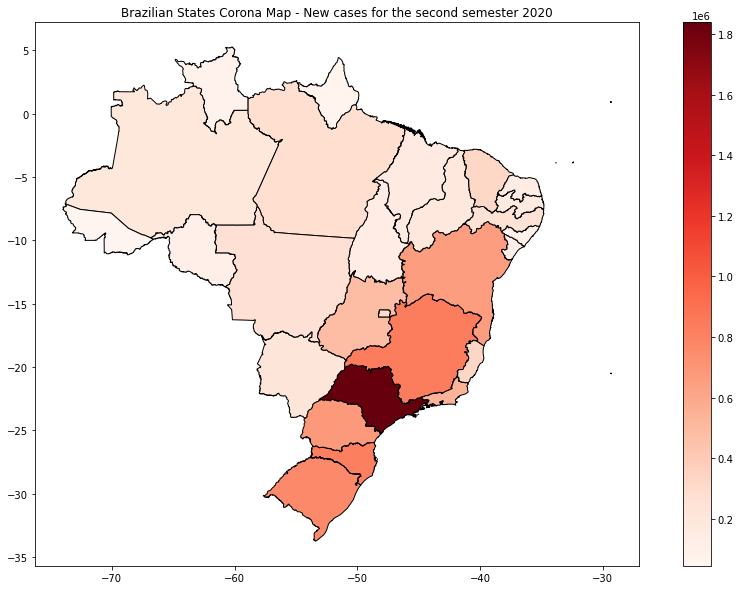

In [36]:
map_2020_02 = merged_df_2020_02.plot(column='casosNovos', figsize = (16,10), legend=True, cmap = 'Reds', edgecolor= 'black')
map_2020_02.set_title('Brazilian States Corona Map - New cases for the second semester 2020')

For the second semester of 2020, São Paulo was the state with the highest number of COVID-19 cases, followed by Minas Gerais, Santa Catarina and Rio Grande do Sul.

## 2021 first semester:

In [37]:
corona_cases_2021_01 = pd.read_csv('HIST_PAINEL_COVIDBR_2021_Parte1_14abr2022.csv',  sep=';')


In [38]:
corona_group_2021_01 = corona_cases_2021_01.groupby('estado')

In [39]:
corona_sum_2021_01 = corona_group_2021_01.sum()

In [40]:
corona_sum_2021_01.head(10)

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
estado,,,,,,,,,,,,
AC,49956,4.779779e+08,4.779251e+07,57155,3.192605e+08,24189866.0,87872,460720,1886,0.0,0.0,181.0
AL,508248,5.042433e+09,4.985755e+08,258440,1.208123e+09,56294964.0,223798,1340548,5702,0.0,0.0,2172.0
AM,148239,1.461289e+09,1.459390e+08,156555,1.500344e+09,120315816.0,402152,3986926,16056,0.0,0.0,2353.0
AP,49232,4.634657e+08,4.634125e+07,42245,3.061546e+08,34380008.0,97974,491228,1820,0.0,0.0,543.0
BA,2199331,2.207023e+10,2.189900e+09,1041215,5.384049e+09,290115370.0,1263188,5657548,29766,0.0,0.0,2353.0
CE,774318,7.724977e+09,7.663862e+08,462210,3.305812e+09,207198914.0,1101778,5452888,25162,0.0,0.0,3439.0
DF,19186,9.593181e+07,9.593181e+06,4970,1.091527e+09,123566128.0,357520,2338868,9984,0.0,0.0,181.0
ES,463360,4.579777e+09,4.518129e+08,198800,1.454751e+09,139377360.0,539282,2923770,12790,0.0,0.0,1267.0
GO,2334176,2.329810e+10,2.315747e+09,616280,2.540644e+09,174276164.0,732546,4389930,24764,0.0,0.0,3801.0


In [41]:
merged_df_2021_01 = pd.merge(left=states_info, right=corona_sum_2021_01, left_on='sigla', right_on='estado')

Text(0.5, 1.0, 'Brazilian States Corona Map - New cases for the fisrt semester 2021')

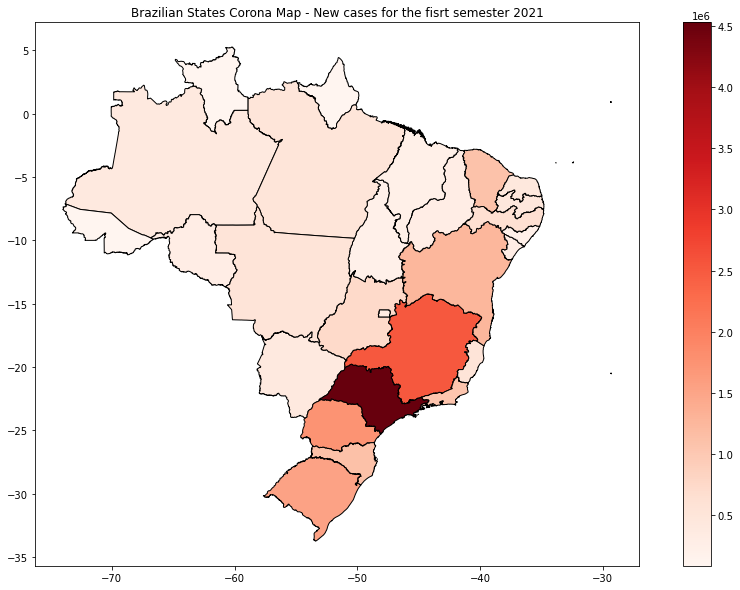

In [70]:
map_2021_01 = merged_df_2021_01.plot(column='casosNovos', figsize = (16,10), legend=True, cmap = 'Reds', edgecolor= 'black')
map_2021_01.set_title('Brazilian States Corona Map - New cases for the fisrt semester 2021')

For the second semester of 2020, São Paulo was the state with the highest number of COVID-19 cases, followed by Minas Gerais, Paraná and Rio Grande do Sul.

## 2021 second semester:

In [43]:
corona_cases_2021_02 = pd.read_csv('HIST_PAINEL_COVIDBR_2021_Parte2_14abr2022.csv',  sep=';')


In [44]:
corona_group_2021_02 = corona_cases_2021_02.groupby('estado')

In [45]:
corona_sum_2021_02 = corona_group_2021_02.sum()

In [46]:
merged_df_2021_02 = pd.merge(left=states_info, right=corona_sum_2021_02, left_on='sigla', right_on='estado')

Text(0.5, 1.0, 'Brazilian States Corona Map - New cases for the second semester 2021')

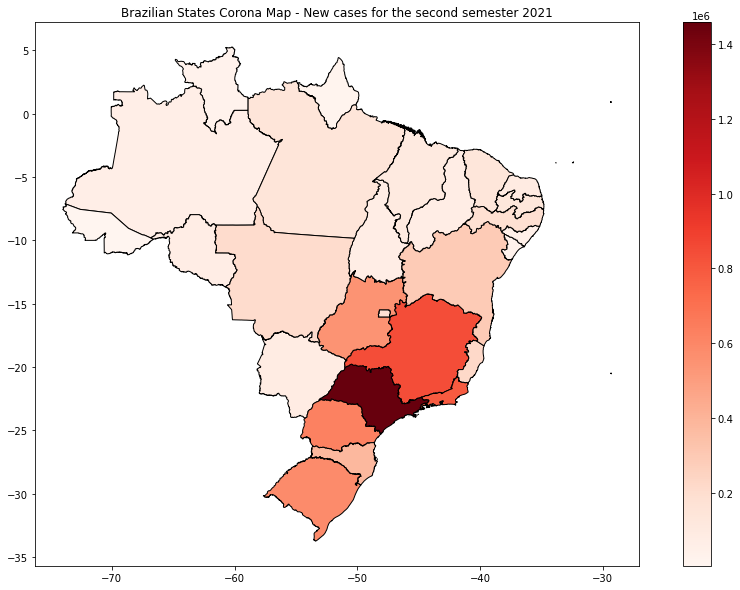

In [47]:
map_2021_02 = merged_df_2021_02.plot(column='casosNovos', figsize = (16,10), legend=True, cmap = 'Reds', edgecolor= 'black')
map_2021_02.set_title('Brazilian States Corona Map - New cases for the second semester 2021')

For the second semester of 2021, São Paulo was the state with the highest number of COVID-19 cases, followed by Minas Gerais, Rio de Janeiro, Paraná, Rio Grande do Sul and Goiás.

Now that we have taken a look at all the maps, we are going to make subplots with the same color bar scale, so we can compare the evolution of the number of cases over time.

In order to do this, we can use **plt.subplots()** and make sure to set *vmin* and *vmax*, so all the maps have the sabe scale.

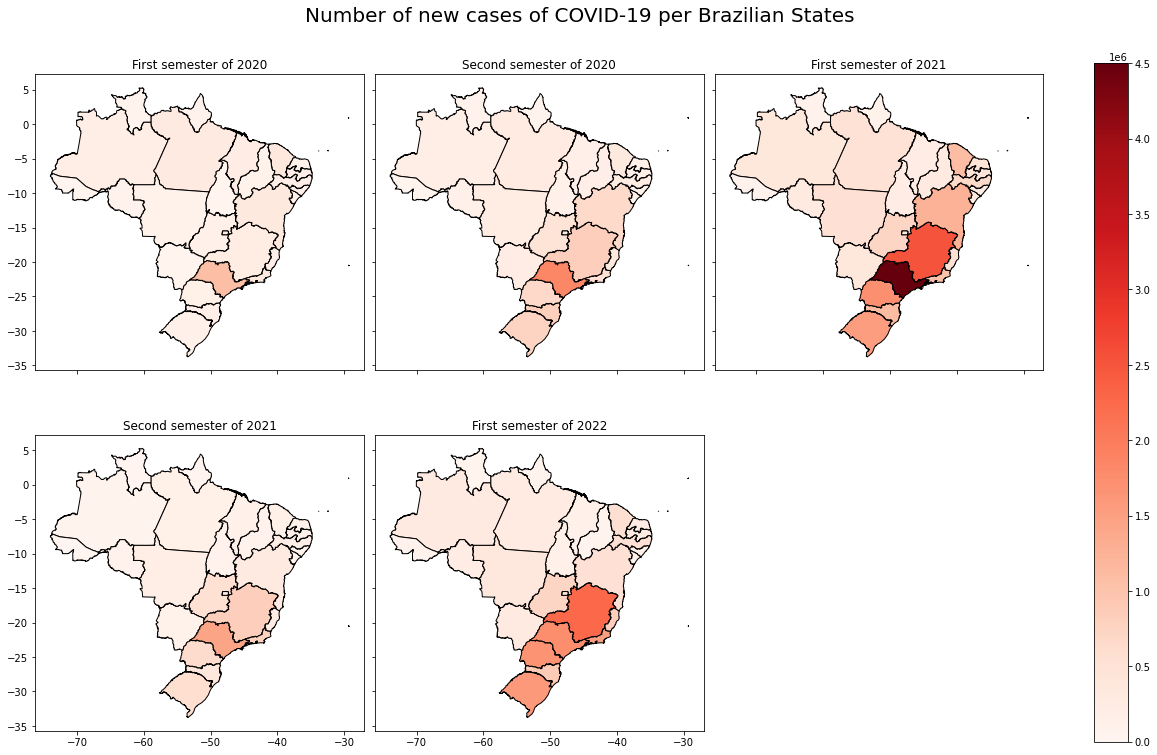

In [56]:
fig, axs = plt.subplots(2,3, figsize=(16,10), 
                        constrained_layout=True, 
                        sharex=True, sharey=True, 
                        subplot_kw=dict(aspect='equal'))

merged_df_2020_01.plot(column='casosNovos', ax=axs[0,0], figsize = (16,10), cmap = 'Reds', edgecolor= 'black', vmin = 0, vmax = 4500000)
axs[0,0].set_title('First semester of 2020')

merged_df_2020_02.plot(column='casosNovos', ax=axs[0,1], figsize = (16,10), cmap = 'Reds', edgecolor= 'black', vmin = 0, vmax = 4500000)
axs[0,1].set_title('Second semester of 2020')

merged_df_2021_01.plot(column='casosNovos', ax=axs[0,2], figsize = (16,10), cmap = 'Reds', edgecolor= 'black', vmin = 0, vmax = 4500000)
axs[0,2].set_title('First semester of 2021')

merged_df_2021_02.plot(column='casosNovos', ax=axs[1,0], figsize = (16,10), cmap = 'Reds', edgecolor= 'black', vmin = 0, vmax = 4500000)
axs[1,0].set_title('Second semester of 2021')

merged_df.plot(column='casosNovos', ax=axs[1,1], figsize = (16,10), cmap = 'Reds', edgecolor= 'black', vmin = 0, vmax = 4500000)
axs[1,1].set_title('First semester of 2022')

fig.delaxes(axs[1,2])
fig.suptitle('Number of new cases of COVID-19 per Brazilian States', fontsize=20, y=1.05)
patch_col = axs[0,0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink = 0.95)


**With our final figure completed, we can draw some conclusions:**

* Brazil's Southeast and South regions had the highest number of COVID cases.
* The first peak of contamination in Brazil took place in the first half of 2021.
* The second peak occurred in the first half of 2022, which we can relate to the emergence of a new variant, called Omicron.

*As a side note, I would like to comment on a few limitations of this project:*

1. Some Brazilian states have a much bigger population than others, being São Paulo and Minas Gerais the most populous. As the data shows the total number of infections, and not the number of infections for a given number of inhabitants, we cannot infer the concentration of infected inhabitants per total number of inhabitants. It is possible that a less inhabited state has a higher concentration of infected inhabitants in relation to other more populous states.

2. This project considers the number of cases of corona virus, but does not take into account the number of deaths from covid-19 infections. Although we have a second peak of contamination in the first half of 2022, according to <a href="https://www.cnnbrasil.com.br/saude/dados-sugerem-que-brasil-passou-pelo-pico-da-omicron-mas-e- need-care/" target="_blank">CNN</a>, the number of deaths did not increase in the same proportion, due to the advance of vaccination in the country.